In [102]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt

In [231]:
event=pd.read_csv('events.csv')
users=pd.read_csv('users.csv')
experiments=pd.read_csv('experiments.csv')

In [239]:
event['event_time']=pd.to_datetime(event.occurred_at)
del event['occurred_at']
event.head(3)

,user_id,event_type,event_name,location,device,user_type,event_time
0,10522.0,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02 11:02:39
1,10522.0,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02 11:02:53
2,10522.0,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02 11:03:28


In [240]:
valid_event=event[  (event.event_time >= '2014-06-01') \
                  & (event.event_time <= '2014-06-30') \
                  & (event.event_name == 'send_message')]
valid_event.head(3)

,user_id,event_type,event_name,location,device,user_type,event_time
1351,11901.0,engagement,send_message,Saudi Arabia,samsung galaxy s4,2.0,2014-06-03 15:13:08
3838,12292.0,engagement,send_message,Spain,macbook pro,2.0,2014-06-06 19:45:30
4479,12382.0,engagement,send_message,Germany,iphone 4s,1.0,2014-06-08 12:16:28


In [241]:
valid_event.groupby('user_id').count().event_time.head()

user_id
4.0      4
11.0     7
19.0     5
20.0     1
22.0    16
Name: event_time, dtype: int64

In [242]:
experiments['experiment_start_time']=pd.to_datetime(experiments.occurred_at)
del experiments['occurred_at']
experiments.head(3)

,user_id,experiment,experiment_group,location,device,user_type,experiment_start_time
0,4.0,publisher_update,control_group,India,lenovo thinkpad,3.0,2014-06-05 15:20:16
1,8198.0,publisher_update,control_group,Japan,nokia lumia 635,1.0,2014-06-11 09:31:32
2,11.0,publisher_update,control_group,United States,iphone 4s,1.0,2014-06-17 09:31:22


In [243]:
users['activated_time']=pd.to_datetime(users.activated_at)
del users['activated_at']
users.head(3)

,user_id,created_at,company_id,language,state,activated_time
0,0.0,2013-01-01 20:59:39,5737.0,english,active,2013-01-01 21:01:07
1,1.0,2013-01-01 13:07:46,28.0,english,pending,NaT
2,2.0,2013-01-01 10:59:05,51.0,english,pending,NaT


In [244]:
valid_user=users[users.activated_time < '2014-06-01']
valid_user.head(3)

,user_id,created_at,company_id,language,state,activated_time
0,0.0,2013-01-01 20:59:39,5737.0,english,active,2013-01-01 21:01:07
3,3.0,2013-01-01 18:40:36,2800.0,german,active,2013-01-01 18:42:02
4,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05


In [245]:
valid_user_event = valid_user.merge(valid_event, left_on='user_id', right_on='user_id', how='inner')
valid_user_event.head(3)

,user_id,created_at,company_id,language,state,activated_time,event_type,event_name,location,device,user_type,event_time
0,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,lenovo thinkpad,3.0,2014-06-05 15:20:51
1,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,dell inspiron desktop,3.0,2014-06-10 06:03:23
2,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,dell inspiron desktop,3.0,2014-06-10 06:04:26


In [246]:
valid_user_event.groupby('user_id').count().event_time.head()

user_id
4.0      4
11.0     7
19.0     5
20.0     1
22.0    16
Name: event_time, dtype: int64

In [248]:
valid_user_event_experiment = valid_user_event.merge(experiments,\
                                                     left_on='user_id',\
                                                     right_on='user_id',\
                                                     how='inner')
valid_user_event_experiment.head(3)

,user_id,created_at,company_id,language,state,activated_time,event_type,event_name,location_x,device_x,user_type_x,event_time,experiment,experiment_group,location_y,device_y,user_type_y,experiment_start_time
0,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,lenovo thinkpad,3.0,2014-06-05 15:20:51,publisher_update,control_group,India,lenovo thinkpad,3.0,2014-06-05 15:20:16
1,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,dell inspiron desktop,3.0,2014-06-10 06:03:23,publisher_update,control_group,India,lenovo thinkpad,3.0,2014-06-05 15:20:16
2,4.0,2013-01-01 14:37:51,5110.0,indian,active,2013-01-01 14:39:05,engagement,send_message,India,dell inspiron desktop,3.0,2014-06-10 06:04:26,publisher_update,control_group,India,lenovo thinkpad,3.0,2014-06-05 15:20:16


In [270]:
valid_user_event_experiment.groupby(['user_id','experiment_group']).count().event_time.to_csv('1.csv')

In [259]:
valid_event.event_name. unique()

array(['send_message'], dtype=object)

In [260]:
valid_event.event_name. unique().size

1

In [261]:
valid_event.event_type.unique()

array(['engagement'], dtype=object)

In [262]:
valid_event.event_type. unique().size

1

In [263]:
valid_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 1351 to 301764
Data columns (total 7 columns):
user_id       7904 non-null float64
event_type    7904 non-null object
event_name    7904 non-null object
location      7904 non-null object
device        7904 non-null object
user_type     7904 non-null float64
event_time    7904 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 494.0+ KB


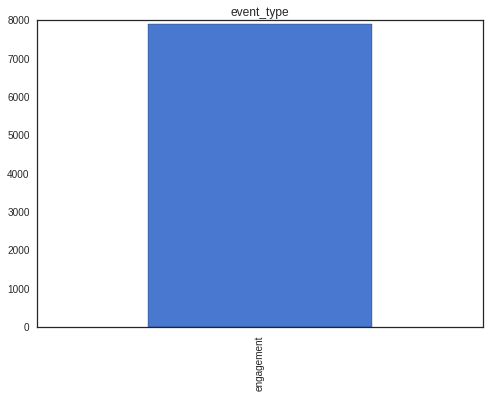

In [264]:
valid_event['event_type'].value_counts().plot(kind='bar', title='event_type')

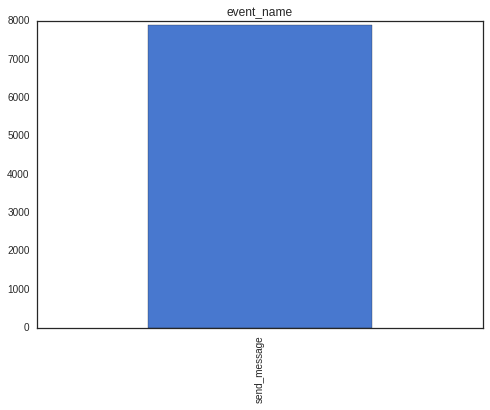

In [265]:
valid_event['event_name'].value_counts().plot(kind='bar', title='event_name')

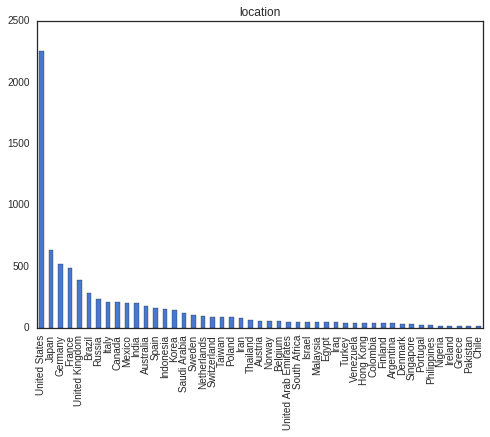

In [266]:
valid_event['location'].value_counts().plot(kind='bar', title='location')

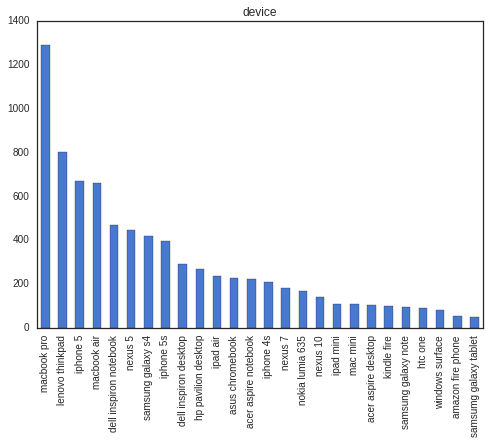

In [267]:
valid_event['device'].value_counts().plot(kind='bar', title='device')                                            

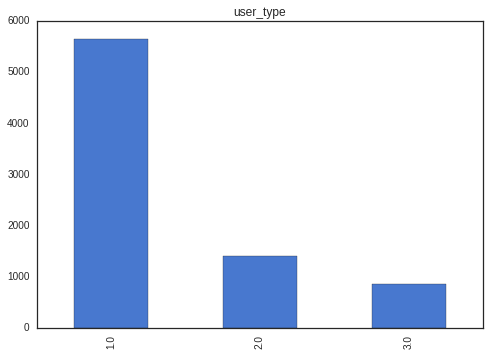

In [268]:
valid_event['user_type'].value_counts().plot(kind='bar', title='user_type')